In [1]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
raw_data = pd.read_csv('2.2 2.01. Admittance.csv')
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [6]:
raw_data.describe()

,SAT
count,168.000000
mean,1695.273810
std,183.019017
min,1334.000000
25%,1547.500000
50%,1691.500000
75%,1844.500000
max,2050.000000


In [7]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [8]:
y = data['Admitted']
x = data['SAT']

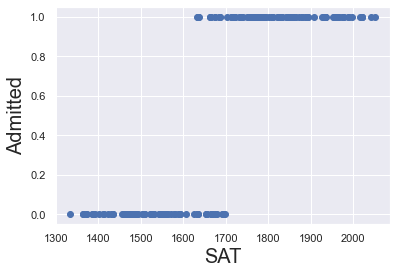

In [9]:
plt.scatter(x, y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

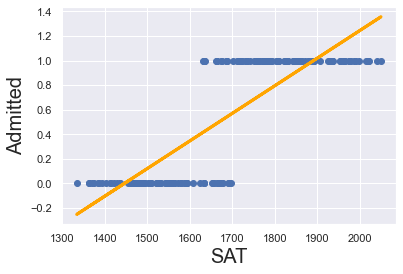

In [10]:
x0 = sm.add_constant(x)
reg_lin = sm.OLS(y,x0)
results_lin = reg_lin.fit()

plt.scatter(x,y)
y_hat = x*results_lin.params[1] + results_lin.params[0]

plt.plot(x,y_hat, lw=3, c='orange')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


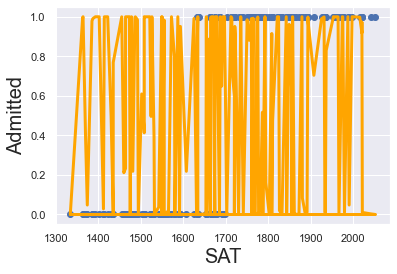

In [14]:
reg_log = sm.Logit(y,x0)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x0*b1) / (1+np.exp(b0+x0*b1)))

f_sorted = np.sort(f(x,results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x))

plt.scatter(x,y)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.plot(x_sorted, f_sorted, lw=3, c='orange')
plt.show()